In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from functools import reduce
import math
import urllib
import difflib

Loading the data of the founding rounds sheet for exploration

In [3]:
df_rounds_fail = pd.read_csv('data/failure/Moneyball 1.1_ Fail - Funding rounds.csv')
df_rounds_success = pd.read_csv('data/success/Moneyball 1.1_ Success - Funding rounds.csv')

Lets explore the new founding rounds sheat

In [24]:
# df_list_SuccessComp[3].head()
df_rounds_success['org_uuid'].nunique(), df_rounds_fail['org_uuid'].nunique()
# df_list_UnsuccessComp[3].nunique()

(2425, 5431)

In [6]:
df_rounds_success['org_uuid'].value_counts()

df30d610-5326-41d5-c448-a4cfb36747a3    7
b01a9c91-e915-4737-86b6-e34adf12283d    7
8e90d05f-a415-dad9-1b01-621527979843    7
08fb213a-b9df-8412-840b-a2db3e49ec0f    7
9f2f1bf0-4139-7ae1-72cb-123d5ad08370    6
                                       ..
8f3e6d2d-c8cb-fca5-e2e4-ca567940c6da    1
eddf0c0e-dcae-f617-c8ea-b135087673ad    1
6859c706-dabe-f168-a3f6-4c45417d9be9    1
557d6676-fc1a-33f0-656b-9871f4a66438    1
70f3a143-e173-4971-b13f-9ebf708e9a2f    1
Name: org_uuid, Length: 2425, dtype: int64

A few companies have several entries for funding rounds, lets plot this

Text(0.5, 1.0, 'Frequency of unique company Ids in funding rounds spreadsheet for success')

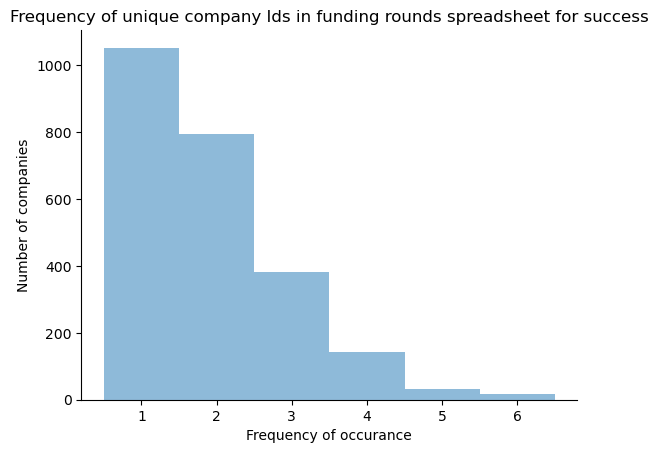

In [8]:
fig, ax = plt.subplots()
ax.hist(df_rounds_success['org_uuid'].value_counts(), bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Frequency of occurance")
ax.set_ylabel("Number of companies")
ax.set_title('Frequency of unique company Ids in funding rounds spreadsheet for success')

Text(0.5, 1.0, 'Frequency of unique company Ids in funding rounds spreadsheet for unsuccessful')

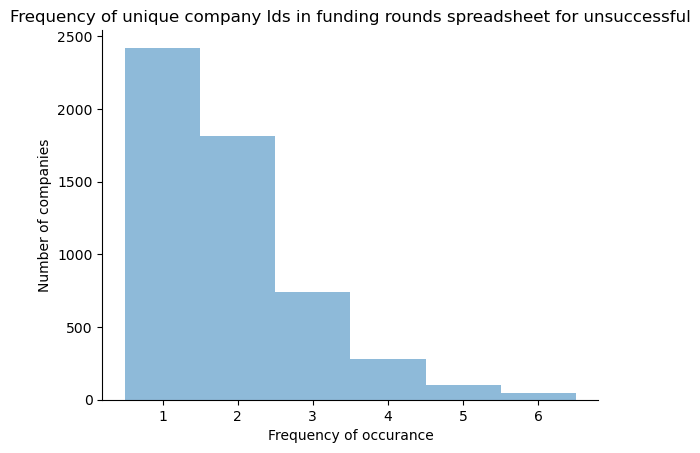

In [9]:
fig, ax = plt.subplots()
ax.hist(df_rounds_fail['org_uuid'].value_counts(), bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Frequency of occurance")
ax.set_ylabel("Number of companies")
ax.set_title('Frequency of unique company Ids in funding rounds spreadsheet for unsuccessful')

These distributions look similar so pure number of funding rounds may not be super indicative of success. Lets plot frequencies of, pre_seed, seed, series_a, angel per company.

In [26]:
# df_rounds_success['org_uuid'].nunique(), df_rounds_fail['org_uuid'].nunique()

count_df_success = df_rounds_success.groupby(['org_uuid', 'investment_type'], as_index=False).size()
count_df_fail    = df_rounds_fail.groupby(['org_uuid', 'investment_type'], as_index=False).size()

count_df_success.loc[count_df_success['investment_type'] == 'pre_seed', 'size'] 

32      1
48      1
54      1
110     1
133     1
       ..
3682    1
3694    1
3708    1
3727    1
3743    1
Name: size, Length: 164, dtype: int64

Text(0.5, 1.0, 'Pre seed funding rounds per company (success)')

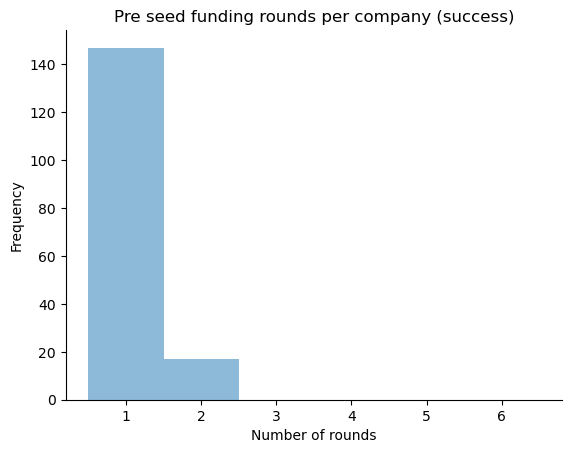

In [12]:
count_df_success = df_rounds_success.groupby(['org_uuid', 'investment_type'], as_index=False).size()
count_df_fail    = df_rounds_fail.groupby(['org_uuid', 'investment_type'], as_index=False).size()

# lets plot this for successful companies
fig, ax = plt.subplots()
ax.hist(count_df_success.loc[count_df_success['investment_type'] == 'pre_seed', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Pre seed funding rounds per company (success)')

Text(0.5, 1.0, 'Pre seed funding rounds per company (Fail)')

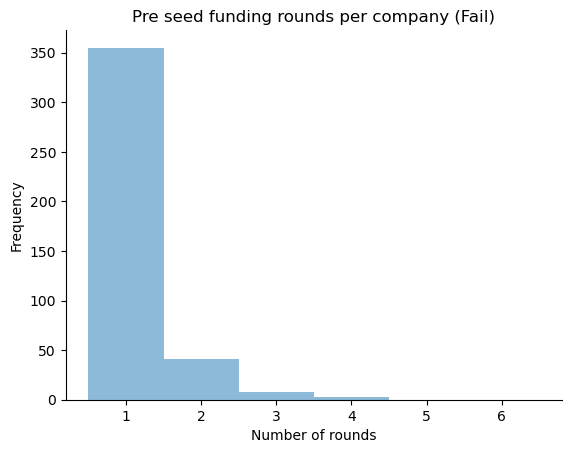

In [13]:
# lets plot this for successful companies
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'pre_seed', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Pre seed funding rounds per company (Fail)')

Text(0.5, 1.0, 'Seed funding rounds per company (Success)')

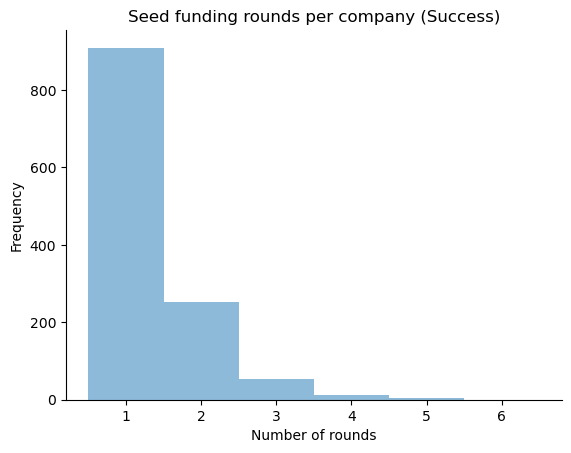

In [14]:
fig, ax = plt.subplots()
ax.hist(count_df_success.loc[count_df_success['investment_type'] == 'seed', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Seed funding rounds per company (Success)')

Text(0.5, 1.0, 'Seed funding rounds per company (Fail)')

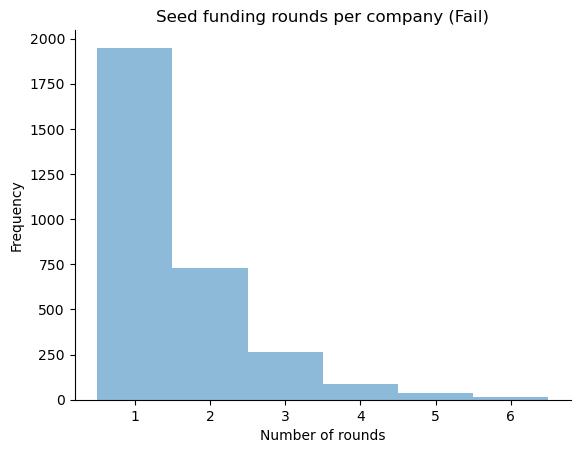

In [15]:
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'seed', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Seed funding rounds per company (Fail)')

Text(0.5, 1.0, 'Series A funding rounds per company (Success)')

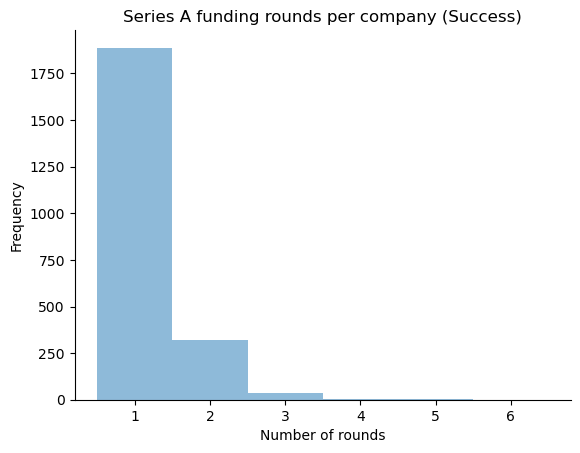

In [16]:
fig, ax = plt.subplots()
ax.hist(count_df_success.loc[count_df_success['investment_type'] == 'series_a', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Series A funding rounds per company (Success)')

Text(0.5, 1.0, 'Series A funding rounds per company (Success)')

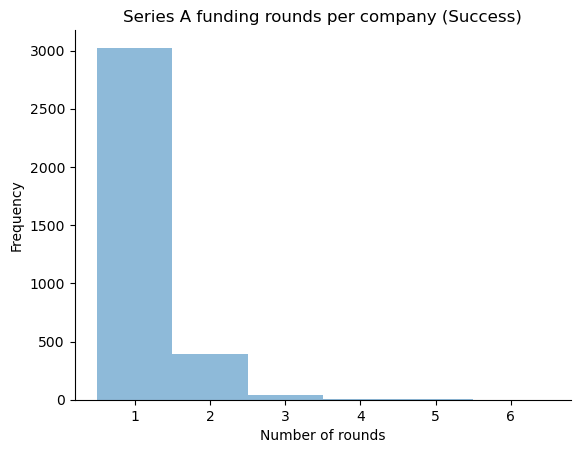

In [17]:
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'series_a', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Series A funding rounds per company (Success)')

Text(0.5, 1.0, 'Angel funding rounds per company (Success)')

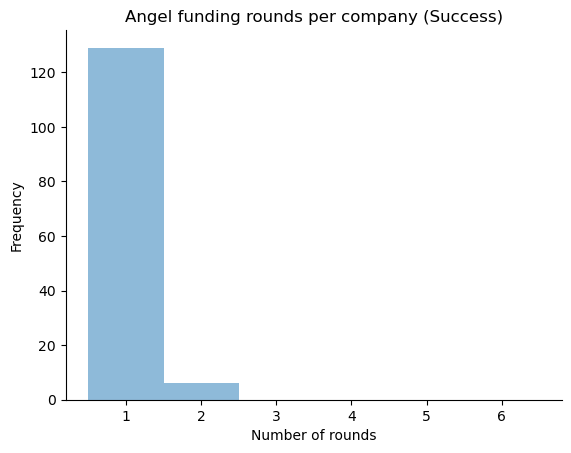

In [21]:
fig, ax = plt.subplots()
ax.hist(count_df_success.loc[count_df_success['investment_type'] == 'angel', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Angel funding rounds per company (Success)')

Text(0.5, 1.0, 'Angel funding rounds per company (Fail)')

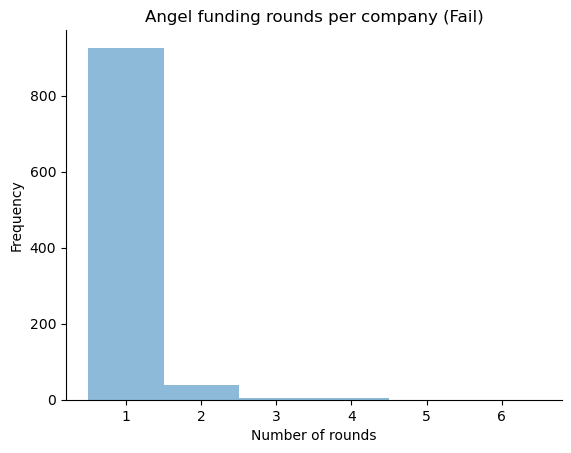

In [20]:
fig, ax = plt.subplots()
ax.hist(count_df_fail.loc[count_df_fail['investment_type'] == 'angel', 'size'], bins=np.arange(7) + 0.5, alpha=0.5)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("Number of rounds")
ax.set_ylabel("Frequency")
ax.set_title('Angel funding rounds per company (Fail)')

This is very interesting, the number of founding rounds at each stage might become a feature for our model. We are not sure yet how indicative they are of company success.